<a href="https://colab.research.google.com/github/erodola/NumMeth-s2-2022/blob/main/esercizi/ex5/ex5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Benvenuti alla quinta esercitazione di *Metodi numerici per l'informatica*. In questa lezione tratteremo la *decomposizione spettrale*, ripercorendo gli esempi visti nella lezione teorica nei diversi esercizi. Iniziamo importando le dipendenze necessarie.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.datasets import mnist
from matplotlib import cm

## Esercizio 1 - PCA

Nel primo esercizio guidato effettuiamo il calcolo degli assi principali nel caso in cui disponiamo di un insieme di dati $\{\mathbf{x}_i\}_{i=1,\dots,N} \in \mathbb{R}^2$. Creaiamo un dataset sintetico a partire da una retta $y = ax + b$, campionando le $x$ da una distribuzione Gaussiana centrata nell'origine e aggiungendo rumore gaussiano sulle diverse $y$:


In [ ]:
# coefficiente angolare della retta
a = 2.
# varianza nelle x
sigma_square_xs = 2.
# varianza nelle y
sigma_square_ys = 3.
# campionamento delle diverse x
xs = sigma_square_xs*np.random.randn(100,1)
# campionamento delle diverse y
ys = a * xs + sigma_square_ys*np.random.randn(100,1)

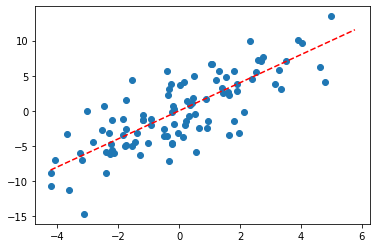

In [ ]:
# visualizziamo i punti campionati insieme alla direzione del modello
plt.scatter(xs, ys)
plt.plot(np.arange(xs.min(),xs.max() + 1), a*np.arange(xs.min(),xs.max() + 1), '--r')

Il nostro obiettivo è stimare l'asse principale (l'inclinazione $a$) utilizzando solo l'insieme dei punti. Per stimare l'asse principale risolviamo il seguente problema di minimizzazione:

$$ \min_{\mathbf{v}} \sum_{i} \Vert \mathbf{x}_i - \text{proj}_{\mathbf{v}}\mathbf{x}_i\Vert^2_2$$
$$ \text{s.t.} \Vert \mathbf{v} \Vert_2 = 1$$

Abbiamo visto dalla lezione teorica che questo problema è equivalente al seguente problema di massimizzazione:

$$ \max_{\mathbf{v}} \mathbf{v}^T \mathbf{X}\mathbf{X}^T \mathbf{v}$$
$$ \text{s.t.} \Vert \mathbf{v} \Vert_2 = 1,$$

dove $\mathbf{X}$ è ottenuta impilando i vettori colonna $\mathbf{x}_i$

Per il teorema min-max, essendo $\mathbf{X}\mathbf{X}^T$ *simmetrica*, il vettore $\mathbf{v}$ che massimizza il problema di ottimizzazione è l'autovettore della matrice $\mathbf{X}\mathbf{X}^T$ avente autovalore massimo.

In [ ]:
# calcoliamo la matrice X
X = np.concatenate([xs.T, ys.T], axis=0)
# stimiamo la matrice simmetrica X_pca = XX^T
X_pca = X@X.T

Nella seguente riga calcoliamo gli autovettori e gli autovalori della matrice `X_pca`. Essendo `X_pca` simmetrica possiamo utilizzare la funzione `np.linalg.eigh` (`h` da matrice hermitiana, l'equivalente complesso delle matrici simmetriche reali). Per quello che abbiamo visto alla lezione teorica, le matrici simmetriche hanno autovalori reali. Nella seconda parte dell'esercitazione vedremo come calcolare gli autovalori: per adesso assumiamo che sappiamo fare ciò usando `eigh`.

In [ ]:
evals_pca, evecs_pca = np.linalg.eigh(X_pca)

# gli autovalori sono ordinati per norma
print(f"evals_pca = { evals_pca }")
# gli autovettori sono le colonne della seguente matrice, ognuno ordinato
# relativamente all'autovalore associato
print(f"evecs_pca = { evecs_pca }")

evals_pca = [ 157.41656012 2938.01989293]
evecs_pca = [[-0.94603265  0.32407132]
 [ 0.32407132  0.94603265]]


In [ ]:
# come detto precedentemente, l'asse principale è l'autovettore associato
# all'autovalore massimo
principal_axis = evecs_pca[:,-1]
# gli altri autovetori sono assi secondari (concetto utile in domini multivariati,
# come vedremo nell'esercizio successivo)
secondary_axis = evecs_pca[:, 0]

Gli autovettori di una matrice simmetrica formano una base ortonormale: verifichiamo questo fatto:

In [ ]:
print(f"principal_axis.T @ secondary_axis = {principal_axis.T @ secondary_axis}")
print(f"norm(secondary_axis) = {np.linalg.norm(secondary_axis)}")
print(f"norm(principal_axis) = {np.linalg.norm(principal_axis)}")

principal_axis.T @ secondary_axis = 0.0
norm(secondary_axis) = 0.9999999999999999
norm(principal_axis) = 0.9999999999999999


Plottiamo gli assi principali trovati e confrontiamo con la direzione obiettivo:

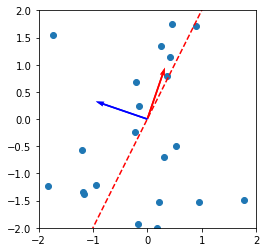

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys)
ax.plot(np.arange(xs.min(),xs.max() + 1), a*np.arange(xs.min(),xs.max() + 1), '--r')
ax.quiver([0,0],[0,0],principal_axis[0],principal_axis[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver([0,0],[0,0],secondary_axis[0],secondary_axis[1], angles='xy', scale_units='xy', scale=1, color='b')
ax.set_aspect('equal')
ax.set_xlim(-2, 2);
ax.set_ylim(-2, 2);

Vediamo cosa succede se effetuiamo la procedura senza aver immesso del rumore sulle $y$:

In [ ]:
sigma_square_xs = 2.
xs = sigma_square_xs*np.random.randn(100,1)
ys = a * xs

In [ ]:
X = np.concatenate([xs.T, ys.T], axis=0)

evals, evecs = np.linalg.eigh(X@X.T)


print(f"evals = { evals }")
print(f"evecs = { evecs }")

In [ ]:
principal_axis = evecs[:, -1]
secondary_axis = evecs[:, 0]

In [ ]:
print(f"norm(principal_axis) = {np.linalg.norm(principal_axis) }")
print(f"norm(secondary_axis) = {np.linalg.norm(secondary_axis) }")

norm(principal_axis) = 1.0
norm(secondary_axis) = 1.0


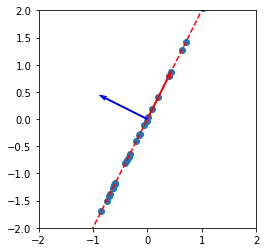

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs, ys)
ax.plot(np.arange(xs.min(),xs.max() + 1), a*np.arange(xs.min(),xs.max() + 1), '--r')
ax.quiver([0,0],[0,0],principal_axis[0],principal_axis[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver([0,0],[0,0],secondary_axis[0],secondary_axis[1], angles='xy', scale_units='xy', scale=1, color='b')
ax.set_aspect('equal')
ax.set_xlim(-2, 2);
ax.set_ylim(-2, 2);

In questo caso l'asse principale coincide con la direzione obiettivo, in quanto i diversi punti si dispongono esattamente sulla retta.

## Esercizio 2 - MNIST PCA

1. Caricare i dati di test del dataset MNIST, contenente immagini monocromatiche 28x28 di caratteri numerici scritti a mano.
2. Filtrare le immagini contenenti il carattere 0. Plottare un esempio.
3. Ripetere l'Esercizio 1 dove i dati sono quelli ottenuti al punto precedente. Rispetto all'esercizio precedente, centrare esplicitamente nell'origine i dati.
4. Plottare le prime 10 direzioni principali.
5. Ottenere 10 immagini combinando linearmente le prime 10 direzioni principali.

BONUS (per casa) Ripetere l'esercizio considerando due classi numeriche diverse, per esempio 0 e 1 e vedere come cambiano gli assi principali.

In [ ]:
_, (Xs, ys) = mnist.load_data()

# Filtrare solo le classi contententi 0 e normalizzare
zero_Xs = ...
zero_Xs = ...

In [ ]:
# Plottare la prima immagine nel dataset

# plt.imshow(zero_Xs[0, :, :])

In [ ]:
# Reshape-are ogni immagine per farla diventare un vettore
X = ...
# Ottenere la media dei punti
X_mean = ...
# Centrare i punti nell'origine
X = ...

# Calcolare la matrice di covarianza
X_mnist = ...

In [ ]:
# Calcolare autovalori e autovettori

evals_mnist, evecs_mnist = ..., ...

In [ ]:
# plottare le prime 10 direzioni principali
for i_direction in range(10):
    # l'i-esima direzione principale
    component = ...
    # plt.figure()
    # plt.imshow(...)
    # plt.colorbar()

In [ ]:
components = ... 
for i in range(10):
    # campionare un vettore di coefficienti in modo random
    coeff_vector = ...
    # combinazione lineare con gli assi principali
    new_x = ...

    # plottare le combinazioni (re-introducendo l'offset rispetto all'origine)
    # plt.figure()
    # plt.imshow(...)
    # plt.colorbar()

## Esercizio 3 - Quoziente di Rayleigh

Il quoziente di Rayleigh di $\mathbf{v}$ rispetto alla matrice $A$ è definito da $\frac{\mathbf{v}^TA \mathbf{v}}{\Vert \mathbf{v} \Vert^2_2}$. In questo esercizio vogliamo vedere come cambia sulla sfera unitaria in $\mathbb{R}^3$.

1. Calcolare una matrice random 3x3 simmetrica $X_\text{sym}$
2. Calcolare gli autovettori di $X_\text{sym}$
3. Visualizzare gli autovettori con `quiver`
4. Plottare il quoziente di Rayleigh sulla sfera unitaria (campionata come una nuvola di punti, per esempio usando `fibonacci_sphere`)

In [3]:
sigma2 = 2
X = ...
print(f"X prima della simmetrizzazione: {X}")
X_sym = ...
print(f"X dopo la simmetrizzazione: {X_sym}")

# Controlliamo il determinante di di X_sym per assicurarci che le colonne sono 
# linearmente indipendenti.
det_X_sym = ...
print(f"Det(X) = { det_X_sym }")
# plt.figure()
# plt.imshow(X_sym)
# plt.colorbar()

X before symmetrization: Ellipsis
X after symmetrization: Ellipsis
Det(X) = Ellipsis


In [8]:
# calcoliamo autovalori e autovettori
evals_sym, evecs_sym = ..., ...

In [9]:
# %matplotlib inline
# ax = plt.figure(figsize=(8, 8)).add_subplot(projection='3d')
# ax.quiver([0,0,0],[0,0,0],[0,0,0],evecs_sym[0,:],evecs_sym[1, :],evecs_sym[2, :],  color='b')
# ax.set_xlim(-1, 1);
# ax.set_ylim(-1, 1);
# ax.set_zlim(-1, 1);

In [7]:
def fibonacci_sphere(samples=5000):
    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = 1 - (i / float(samples - 1)) * 2  # y goes from 1 to -1
        radius = math.sqrt(1 - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append((x, y, z))

    return points

In [11]:
# Otteniamo i punti attraverso fibonacci_sphere()
points = ... # fibonacci_sphere()
points = ... # np.asarray(points)

# Calcoliamo il coefficiente di Rayleigh sui punti della sfera
rayleigh = ...

# Visualizzazione

# fig = plt.figure(figsize=(8, 8))
# ax = plt.axes(projection='3d')
# ax.scatter3D(points[:,0], points[:,1], points[:,2], s=0.5, c=rayleigh)
# plt.colorbar()

# ax.quiver([0],[0,],[0,],evecs_sym[0,0],evecs_sym[1, 0],evecs_sym[2, 0],  color=cm.viridis(0.))
# ax.quiver([0],[0,],[0,],evecs_sym[0,1],evecs_sym[1, 1],evecs_sym[2, 1],  color=cm.viridis(0.5))
# ax.quiver([0],[0,],[0,],evecs_sym[0,2],evecs_sym[1, 2],evecs_sym[2, 2],  color=cm.viridis(1.))

# ax.set_xlim(-1, 1);
# ax.set_ylim(-1, 1);
# ax.set_zlim(-1, 1);

## Esercizio 4 - Power Iteration

1. Implementare la Power Iteration nella funzione `power_iteration(A, steps)`,
la funzione deve restituire anche i risultati intermedi in una lista `interm`
2. Applicare `power_iteration(A, steps)` su `X_pca` dell'Esercizio 1.
3. Confrontare il risultato ottenuto con l'autovettore `evecs_pca[:, -1]` relativo all'autovalore massimo dell'Esercizio 1.
4. Visualizzare l'errore per ogni step dell'iterazione relativamente a `evecs_pca[:, -1]`

BONUS. Creare un'animazione dove vengono visualizzati i risultati intermedi della Power Iteration

In [ ]:
def power_iteration(A, steps=10):
    ...

In [15]:
# A = X_pca

# Calcoliamo l'autovettore massimo usando power_iteration (e le soluzioni intermedie)
evec_max, interm = ..., ...

# Concateniamo i risultati intermedi in una matrice 
interm = ...
# Otteniamo l'autovalore massimo come quoziente di Rayleigh
eval_max = ...

In [16]:
# print(f"evec_max = {evec_max}")
# print(f"evec_max_pca = {evecs_pca[:, -1]}")
# print(f"eval_max = {eval_max}")
# print(f"eval_max_pca = {evals_pca[-1]}")

In [19]:
# Calcoliamo l'errore tra la soluzione e le ipotesi intermedie
error = ...
# plt.figure()
# plt.plot(np.arange(10), error)

## Esercizio 5 - Inverse Iteration

1. Usare la Power Iteration definita nell'esercizio precedente per ottenere l'autovettore minimo di `X_pca` dell'Esercizio 1.
2. Confrontare il risultato ottenuto con l'autovettore `evecs_pca[:, 0]` relativo all'autovalore minimo dell'Esercizio 1.
4. Visualizzare l'errore per ogni step dell'iterazione relativamente a `evecs_pca[:, 0]`

In [24]:
# A = X_pca

evec_min, interm = ..., ...
interm = ... 
eval_min = ... 

In [20]:
# print(f"evec_min = {evec_min}")
# print(f"evec_min_pca = {evecs_pca[:, 0]}")
# print(f"eval_min = {eval_min}")
# print(f"eval_min_pca = {evals_pca[0]}")

In [21]:
error = ...
# plt.figure()
# plt.plot(np.arange(10), np.linalg.norm(interm + evecs_pca[:, 0][:, np.newaxis], axis=0))

## Esercizio 6 - Shifting

1. Calcolare l'autovalore intermedio dell'Esercizio 3 usando la tecnica del shifting (senza utilizzare `np.linalg.eigh`). Per stimare la $\sigma$ di shift, possiamo calcolare per prima cosa gli autovalori estremi con la Power Iteration e con la Power Iteration inversa.
2. Shiftare di un valore compreso tra gli estremi trovati nel primo punto: effettuare una grid search per trovare il nuovo autovalore.
3. Confrontare il valore trovato con quello restituito da `np.linalg.eigh`.

In [30]:
# A = X_sym

# Calcolo dell'autovettore minimo e massimo
evec_min, _ = ..., ...
evec_max, _ = ..., ... 

# Calcolo dell'autovalore minimo e massimo
eval_min = ...
eval_max = ...

In [ ]:
# print(f"eval_max = {eval_max}")
# print(f"eval_min = {eval_min}")

eval_max = 9.416130090047965
eval_min = 0.12060875223571152


In [33]:
# Grid search su 10 valori intermedi a eval_min e eval_max
for sigma in range(10):
    # effettuare lo shift di sigma sulla matrice A
    A_shifted = ...
    # ottenere l'autovettore shiftato
    evec_middle, _ = ..., ...
    # calcolo dell'autovalore relativo
    eval_middle = ...
    # print(f"eval_middle = {eval_middle}")
    # uscire quando è stato trovato l'autovalore nuovo

    # if not np.isclose(eval_middle, eval_min) and not np.isclose(eval_middle, eval_max):
    #    break
  
# Confrontare il valore trovato con quello restituito da `np.linalg.eigh`:
# np.linalg.eigh(A)[0]

## Esercizio 7 - QR Iteration

1. Implementare le Iterazioni QR nella funzione `QR_iterations(A, steps)` (usare
`np.linalg.qr` per effettuare la fattorizzazione QR)
2. Calcolare tutti i valori assoluti degli autovalori della matrice `X_mnist` dell'Esercizio 2 usando l'le iterazioni QR prima con 10 steps poi con 100 steps.
Sortare questa sequenza rispetto al valore assoluto.
3. Confrontare i risultati ottenuti con gli autovalori ottenuti nell'Esercizio 2 (plottando una porzione di essi e effettuando la distanza $L_2$) e vedere come cambiano i risultati all'aumentare del numero di iterazioni.

In [36]:
def QR_iterations(A, steps=100):
  ...

In [42]:
# A = X_mnist

# calcoliamo i moduli degli autovalori su  e sortiamo (usiamo 10 passi di iterazione)
qr_evals = ...

In [43]:
# Compariamo (gli ultimi 25) valori assoluti di `qr_evals` con quelli ottenuti attraverso `np.linalg.eigh`:

# plt.plot(np.sort(np.abs(qr_evals))[-25:])
# plt.plot(np.sort(np.abs(evals_mnist))[-25:])
error = ...
print(f"L2(qr_evals, evals_mnist) = {error}")

L2(qr_evals, evals_mnist) = Ellipsis


In [45]:
# Usiamo 100 passi di iterazione
qr_evals = ...

In [47]:
# plt.plot(np.sort(np.abs(qr_evals))[-25:])
# plt.plot(np.sort(np.abs(evals_mnist))[-25:])
error = ...
print(f"L2(qr_evals, evals_mnist) = {error}")

L2(qr_evals, evals_mnist) = Ellipsis
